### Agentic RAG

In [20]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [21]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [22]:
from langchain_community.document_loaders import WebBaseLoader

urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs=[WebBaseLoader(url).load() for url in urls]
# docs

from langchain_text_splitters import RecursiveCharacterTextSplitter

docs=[WebBaseLoader(url).load() for url in urls]

docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retriever=vectorstore.as_retriever() 
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs = [WebBaseLoader(url).load() for url in urls]

docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)

retriever = vectorstore.as_retriever()

In [23]:
retriever.invoke("what is langgraph")

[Document(id='7f031457-5cf9-418a-8c1b-cfd0d94c8d38', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='e1eb82a7-ce45-4127-90a9-18ff802beadf', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='42343513-8661-43c9-9970-d0a3cf970042', metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...')]

In [24]:
### Retriever To Retriever Tools
from langchain_classic.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

In [25]:
retriever_tool

StructuredTool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x14d14da80>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x14d14d440>)

### Langchain Blogs- Seperate Vector Store


In [26]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'LangChain overview - Docs by LangChain', 'description': 'LangChain is an open source framework with a pre-built agent architecture and integrations for any model or tool — so you can build agents that adapt as fast as the ecosystem evolves', 'language': 'en'}, page_content='LangChain overview - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChain overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewGet startedInstallQuickstartChangelogPhilosophyCore componentsAgentsModelsMessagesToolsShort-term memoryStreamingStructured outputMiddlewareOverviewBuilt-in middlewareCustom middlewareAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol (MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryAgent developmentLangSmith StudioTestAgent Chat UI

In [27]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [28]:
from langchain_classic.tools.retriever import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [29]:
tools=[retriever_tool,retriever_tool_langchain]

### LangGraph Workflow

In [30]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [31]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen/qwen3-32b")
llm.invoke("Hi")

AIMessage(content='<think>\nOkay, the user just said "Hi." That\'s a greeting. I need to respond appropriately. Let me think about the best way to reply. Since it\'s a simple greeting, maybe I should acknowledge it and offer assistance. They might be looking for someone to chat with or have a specific question.\n\nI should keep it friendly and open-ended. Maybe something like, "Hello! How can I assist you today?" That way, it invites them to elaborate on what they need help with. I need to make sure the tone is welcoming and not too formal. Also, checking if there\'s any context from previous interactions, but since this is the start, there\'s nothing to reference. Alright, that response should work.\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 161, 'prompt_tokens': 9, 'total_tokens': 170, 'completion_time': 0.325663691, 'completion_tokens_details': None, 'prompt_time': 0.000278846, 'prompt_tokens_deta

In [32]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="qwen/qwen3-32b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [40]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain_classic import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [34]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="qwen/qwen3-32b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [35]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="qwen/qwen3-32b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [36]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="qwen/qwen3-32b")
    response = model.invoke(msg)
    return {"messages": [response]}

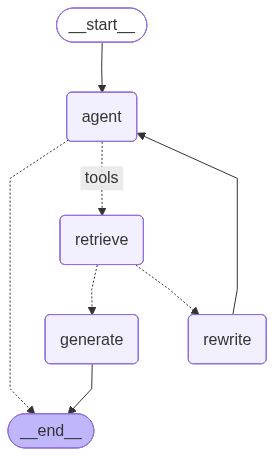

In [37]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [38]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='ce138498-cf3f-4492-9343-b445ef8e4adc'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langgraph?" Let me figure out how to approach this.\n\nFirst, I need to check if there\'s a function available to retrieve information about Langgraph. Looking at the provided tools, there\'s a function called "retriever_vector_db_blog" which is for searching and running information about Langgraph. The other function is for Langchain, which might be related but not exactly what the user is asking for.\n\nSince the user specifically mentioned Langgraph, I should use the first function. The function requires a query parameter. The user\'s query is straightforward, so the query parameter should be "What is Langgraph?" to get the most relevant information. I need to structure the tool call correctly, making sure the name of the function is accurate

In [41]:
graph.invoke({"messages":"What is Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='18badb1c-444b-4f5f-a879-bab1b59057c8'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langchain?" I need to figure out which tool to use here. Let me check the available functions. There\'s one called retriever_vector_db_blog for Langgraph and another called retriever_vector_langchain_blog for Langchain. Since the question is specifically about Langchain, the second function seems appropriate. I should call that function with a query parameter that\'s "What is Langchain?" to retrieve the necessary information. Let me make sure the parameters are correct. The function requires a "query" string, which I have. Alright, I\'ll structure the tool call accordingly.\n', 'tool_calls': [{'id': 'f8p58dtbw', 'function': {'arguments': '{"query":"What is Langchain?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response

In [42]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='e4e91123-6452-48e2-a810-b6238b024fb7'),
  AIMessage(content='The provided tools are designed to search for information specific to Langgraph and Langchain, but this question is a general definition inquiry about machine learning. Since there is no tool available to directly answer this, I will clarify that the tools cannot address this query and instead provide a general explanation.\n\n**Answer:**  \nMachine learning is a subset of artificial intelligence that focuses on developing algorithms and models that enable computers to learn patterns and make decisions from data without being explicitly programmed for specific tasks. It involves training models on datasets to recognize patterns, predict outcomes, or adapt their behavior based on experience (the data). Common applications include image recognition, natural language processing, recommendation systems, and more.', addi